In [1]:
# HIDDEN in jupyterbook 
#This is code to manage dependencies if the notebook is executed in the google colab cloud service
if 'google.colab' in str(get_ipython()):
  import os
  os.system('apt -qqq install graphviz')
  os.system('pip -qqq install ModelFlowIb ipysheet  --no-dependencies ')
  incolab = True  
else:
  incolab = False 

%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib
import warnings
#warnings.filterwarnings("ignore")

In [3]:
import pandas as pd

# Modules from Modelflow 
from modelclass import model 

# optional functionalities 
model.widescreen()
model.scroll_off()

# Output compatabiltity with LaTeX 
latex=True

In [4]:
mpak,baseline = model.modelload('../models/pak.pcim',alfa=0.7,run=1,keep='Business as Usual')
alternative  =  baseline.upd("<2020 2100> PAKGGREVCO2CER PAKGGREVCO2GER PAKGGREVCO2OER = 30")
result = mpak(alternative,2020,2100,keep='Carbon tax nominal 30') # simulates the model 

file read:  C:\modelflow manual\papers\mfbook\content\models\pak.pcim


In [5]:
mpak['PAKCCEMISCO2TKN'].frml

PAKCCEMISCO2TKN : FRML <IDENT> PAKCCEMISCO2TKN = PAKCCEMISCO2CKN+PAKCCEMISCO2OKN+PAKCCEMISCO2GKN $


In [6]:
with mpak.set_smpl(2021,2025):
    mpak['PAKCCEMISCO2TKN'].dekomp()


Formula        : FRML <IDENT> PAKCCEMISCO2TKN = PAKCCEMISCO2CKN+PAKCCEMISCO2OKN+PAKCCEMISCO2GKN $ 

                        2021         2022         2023         2024         2025
Variable    lag                                                                 
Base        0   217548186.56 221072469.97 225253519.79 230370294.27 236240658.85
Alternative 0   158136496.56 162262040.05 167116569.38 173010036.73 179772129.03
Difference  0   -59411690.00 -58810429.92 -58136950.40 -57360257.55 -56468529.82
Percent     0         -27.31       -26.60       -25.81       -24.90       -23.90

 Contributions to differende for  PAKCCEMISCO2TKN
                            2021         2022         2023         2024         2025
Variable        lag                                                                 
PAKCCEMISCO2CKN 0   -24251583.97 -24147394.08 -23999340.06 -23829476.98 -23631866.29
PAKCCEMISCO2OKN 0   -14968093.58 -15456795.05 -15753667.05 -15847991.86 -15778083.81
PAKCCEMISCO2GKN 0   -2

In [7]:
mpak['PAKNECONPRVTXN'].eviews

PAKNECONPRVTXN : @IDENTITY PAKNECONPRVTXN  = ((PAKNECONENGYSH^PAKCESENGYCON)  * PAKNECONENGYXN^(1  - PAKCESENGYCON)  + (PAKNECONOTHRSH^PAKCESENGYCON)  * PAKNECONOTHRXN^(1  - PAKCESENGYCON))^(1  / (1  - PAKCESENGYCON))


In [8]:
mpak['PAKNECONPRVTXN'].frml

PAKNECONPRVTXN : FRML <IDENT> PAKNECONPRVTXN = ((PAKNECONENGYSH**PAKCESENGYCON)*PAKNECONENGYXN**(1-PAKCESENGYCON)+(PAKNECONOTHRSH**PAKCESENGYCON)*PAKNECONOTHRXN**(1-PAKCESENGYCON))**(1/(1-PAKCESENGYCON)) $


In [9]:
with mpak.set_smpl(2021,2025):
    mpak['PAKNECONPRVTXN'].dekomp()


Formula        : FRML <IDENT> PAKNECONPRVTXN = ((PAKNECONENGYSH**PAKCESENGYCON)*PAKNECONENGYXN**(1-PAKCESENGYCON)+(PAKNECONOTHRSH**PAKCESENGYCON)*PAKNECONOTHRXN**(1-PAKCESENGYCON))**(1/(1-PAKCESENGYCON)) $ 

                      2021       2022       2023       2024       2025
Variable    lag                                                       
Base        0         1.82       1.98       2.14       2.30       2.45
Alternative 0         1.89       2.07       2.23       2.39       2.55
Difference  0         0.07       0.08       0.09       0.10       0.10
Percent     0         3.84       4.11       4.21       4.18       4.06

 Contributions to differende for  PAKNECONPRVTXN
                         2021       2022       2023       2024       2025
Variable       lag                                                       
PAKNECONENGYSH 0        -0.00      -0.00      -0.00      -0.00      -0.00
PAKCESENGYCON  0        -0.00      -0.00      -0.00      -0.00      -0.00
PAKNECONENGYXN 0   

In [10]:
mpak['PAKNECONOTHRXN'].eviews

PAKNECONOTHRXN : DLOG(PAKNECONOTHRXN) = 0.590372627657176*DLOG(PAKNYGDPFCSTXN) + D(PAKGGREVGNFSXN/100) + (1 - 0.590372627657176)*DLOG(PAKNEIMPGNFSXN) + 0.2*PAKNYGDPGAP_/100


In [11]:
with mpak.set_smpl(2021,2025):
    mpak['PAKNECONOTHRXN'].dekomp()


Formula        : FRML <DAMP,STOC> PAKNECONOTHRXN = (PAKNECONOTHRXN(-1)*EXP(PAKNECONOTHRXN_A+ (0.590372627657176*((LOG(PAKNYGDPFCSTXN))-(LOG(PAKNYGDPFCSTXN(-1))))+((PAKGGREVGNFSXN/100)-(PAKGGREVGNFSXN(-1)/100))+(1-0.590372627657176)*((LOG(PAKNEIMPGNFSXN))-(LOG(PAKNEIMPGNFSXN(-1))))+0.2*PAKNYGDPGAP_/100) )) * (1-PAKNECONOTHRXN_D)+ PAKNECONOTHRXN_X*PAKNECONOTHRXN_D  $ 

                      2021       2022       2023       2024       2025
Variable    lag                                                       
Base        0         1.86       2.02       2.18       2.34       2.50
Alternative 0         1.92       2.09       2.26       2.43       2.59
Difference  0         0.06       0.07       0.08       0.09       0.09
Percent     0         3.18       3.50       3.65       3.67       3.58

 Contributions to differende for  PAKNECONOTHRXN
                           2021       2022       2023       2024       2025
Variable         lag                                                       
P

In [12]:
mpak['PAKNECONOTHRXN'].dif.df

,PAKNECONOTHRXN
2020,0.045473
2021,0.059084
2022,0.070827
2023,0.079797
2024,0.085849
...,...
2096,0.430279
2097,0.449908
2098,0.470503
2099,0.492105


In [13]:
control,delta,contributions=mpak.dekomp('PAKNECONOTHRXN',lprint=False,start=2020,end=2027)
pd.set_option('display.float_format', '{:.2f}'.format)
control

,,2020,2021,2022,2023,2024,2025,2026,2027
Variable,lag,,,,,,,,
Base,0,1.70,1.86,2.02,2.18,2.34,2.50,2.65,2.81
Alternative,0,1.74,1.92,2.09,2.26,2.43,2.59,2.74,2.90
Difference,0,0.05,0.06,0.07,0.08,0.09,0.09,0.09,0.09
Percent,0,2.68,3.18,3.50,3.65,3.67,3.58,3.42,3.23


In [14]:
delta

2020  2021  2022  2023  2024  2025  2026  2027
Variable         lag                                                
PAKNECONOTHRXN   -1  -0.00  0.05  0.06  0.08  0.09  0.09  0.09  0.10
PAKNECONOTHRXN_A  0  -0.00 -0.00 -0.00 -0.00 -0.00 -0.00 -0.00 -0.00
PAKNYGDPFCSTXN    0   0.00  0.01  0.01  0.02  0.02  0.02  0.03  0.03
                 -1  -0.00 -0.00 -0.01 -0.01 -0.02 -0.02 -0.03 -0.03
PAKGGREVGNFSXN    0  -0.00 -0.00 -0.00 -0.00 -0.00 -0.00 -0.00 -0.00
                 -1  -0.00 -0.00 -0.00 -0.00 -0.00 -0.00 -0.00 -0.00
PAKNEIMPGNFSXN    0   0.04  0.04  0.05  0.05  0.05  0.05  0.05  0.05
                 -1  -0.00 -0.05 -0.05 -0.05 -0.05 -0.05 -0.05 -0.05
PAKNYGDPGAP_      0   0.00  0.00  0.00  0.00  0.00 -0.00 -0.00 -0.00
PAKNECONOTHRXN_D  0  -0.00 -0.00 -0.00 -0.00 -0.00 -0.00 -0.00 -0.00
PAKNECONOTHRXN_X  0  -0.00 -0.00 -0.00 -0.00 -0.00 -0.00 -0.00 -0.00

In [15]:
delta.groupby('Variable',sort=False).sum()

,2020,2021,2022,2023,2024,2025,2026,2027
Variable,,,,,,,,
PAKNECONOTHRXN,-0.00,0.05,0.06,0.08,0.09,0.09,0.09,0.10
PAKNECONOTHRXN_A,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
PAKNYGDPFCSTXN,0.00,0.01,0.01,0.00,0.00,0.00,-0.00,-0.00
PAKGGREVGNFSXN,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
PAKNEIMPGNFSXN,0.04,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
PAKNYGDPGAP_,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00
PAKNECONOTHRXN_D,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
PAKNECONOTHRXN_X,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00


In [16]:
contributions.groupby('Variable',sort=False).sum() # as a percent of the total change (the omegas)

,2020,2021,2022,2023,2024,2025,2026,2027
Variable,,,,,,,,
PAKNECONOTHRXN,-0.00,84.72,91.07,96.01,99.72,102.42,104.35,105.74
PAKNEIMPGNFSXN,91.72,-4.17,-4.17,-4.17,-4.22,-4.25,-4.29,-4.33
PAKNYGDPFCSTXN,1.84,11.50,7.43,4.65,2.54,1.00,-0.13,-0.98
PAKNECONOTHRXN_A,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
PAKGGREVGNFSXN,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
PAKNECONOTHRXN_D,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
PAKNECONOTHRXN_X,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
PAKNYGDPGAP_,6.65,6.51,4.31,2.11,0.49,-0.68,-1.46,-1.95
Total,100.21,98.56,98.63,98.59,98.53,98.48,98.47,98.48


In [17]:
pd.reset_option('display.float_format')

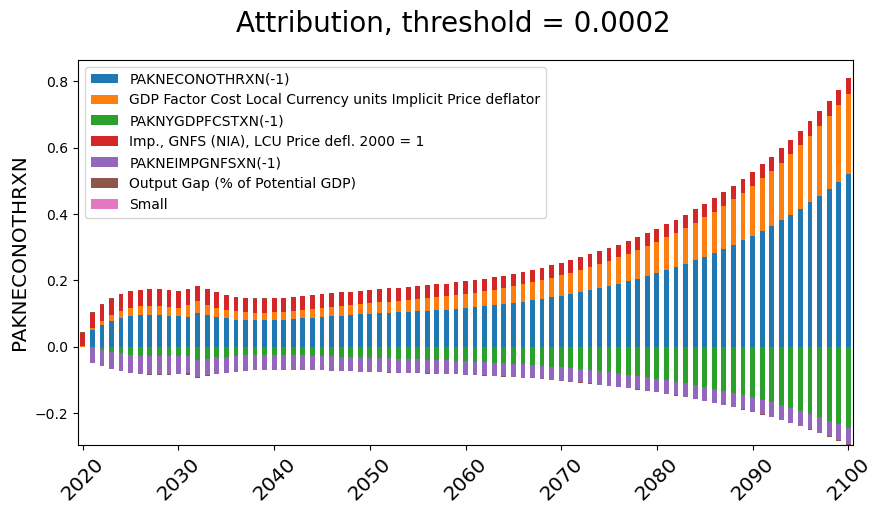

In [18]:
fig=mpak.dekomp_plot('PAKNECONOTHRXN',pct=False,rename=True,threshold=.0002,lag=True); #decomp of teh change in the level

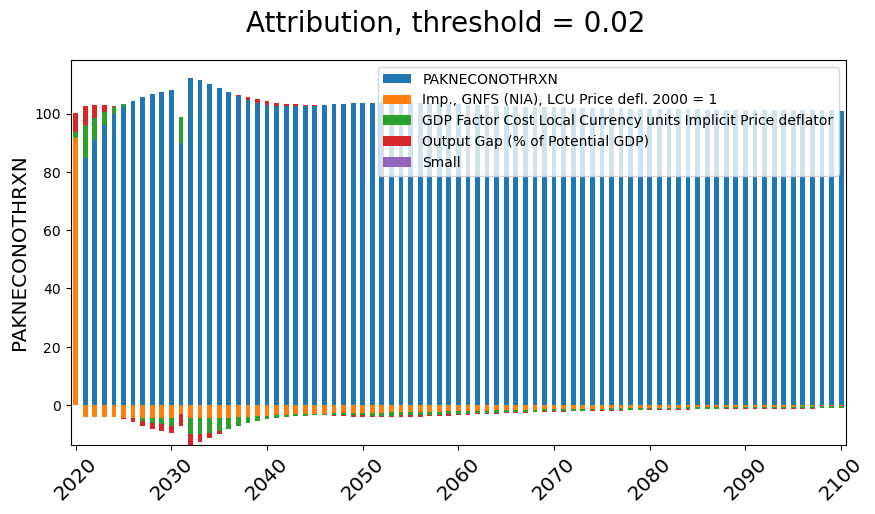

In [19]:
fig=mpak.dekomp_plot('PAKNECONOTHRXN',pct=True,rename=True,threshold=.02,lag=False); # expressed as a share (the conmtrinutions share)

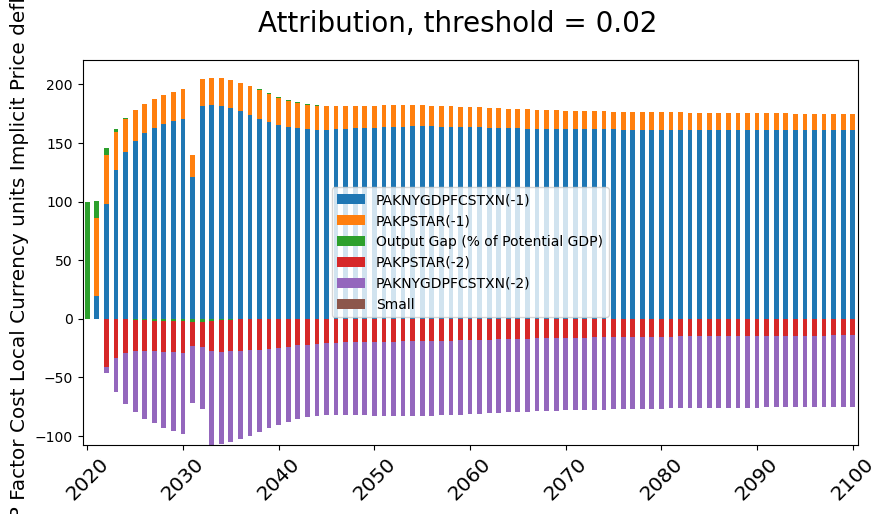

In [20]:
fig=mpak.dekomp_plot('PAKNYGDPFCSTXN',pct=True,rename=True,threshold=.02);

In [21]:
help(mpak.dekomp_plot)

Help on method dekomp_plot in module modelclass:

dekomp_plot(varnavn, sort=True, pct=True, per='', top=0.9, threshold=0.0, lag=True, rename=True, nametrans=<function Dekomp_Mixin.<lambda> at 0x0000026A37FF5BD0>, time_att=False) method of modelclass.model instance
    Returns  a chart with attribution for a variable over the smpl  
    
    Parameters
    ----------
    varnavn : TYPE
        variable name.
    sort : TYPE, optional
        . The default is False.
    pct : TYPE, optional
        display pct contribution . The default is True.
    per : TYPE, optional
        DESCRIPTION. The default is ''.
    threshold : TYPE, optional
        cutoff. The default is 0.0.
    rename : TYPE, optional
        Use descriptions instead of variable names. The default is True.
    time_att : TYPE, optional
        Do time attribution . The default is False.
    lag : TYPE, optional
       separete by lags The default is True.           
    top : TYPE, optional
      where to place the titl

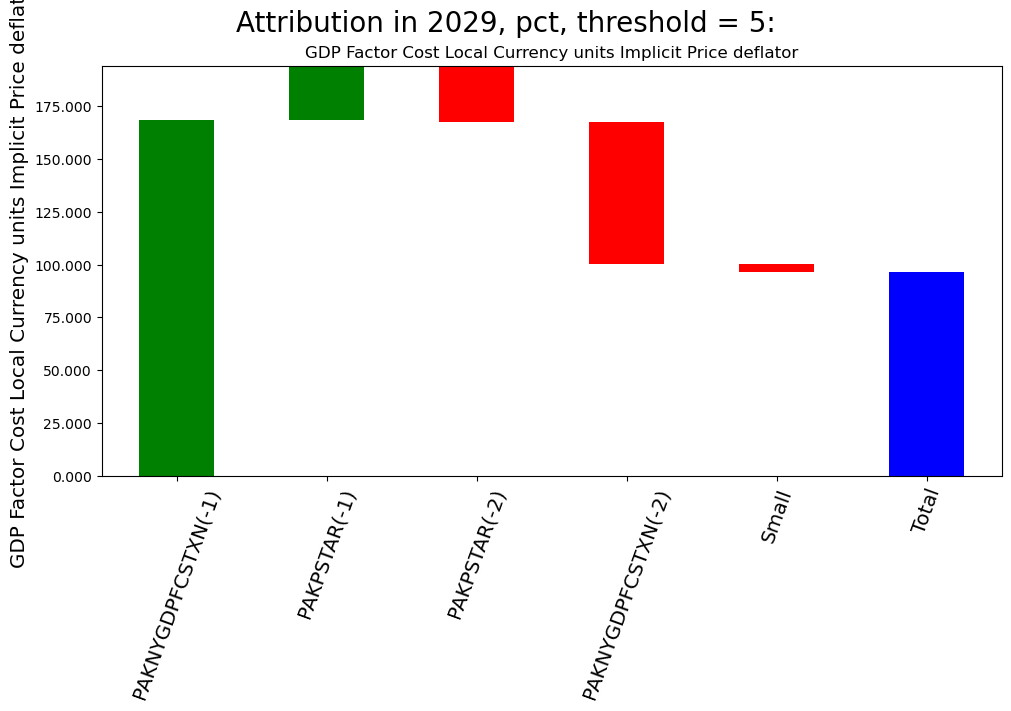

In [22]:
mpak.dekomp_plot_per('PAKNYGDPFCSTXN',per=2029,threshold=5)  # gives a waterfall of contributions

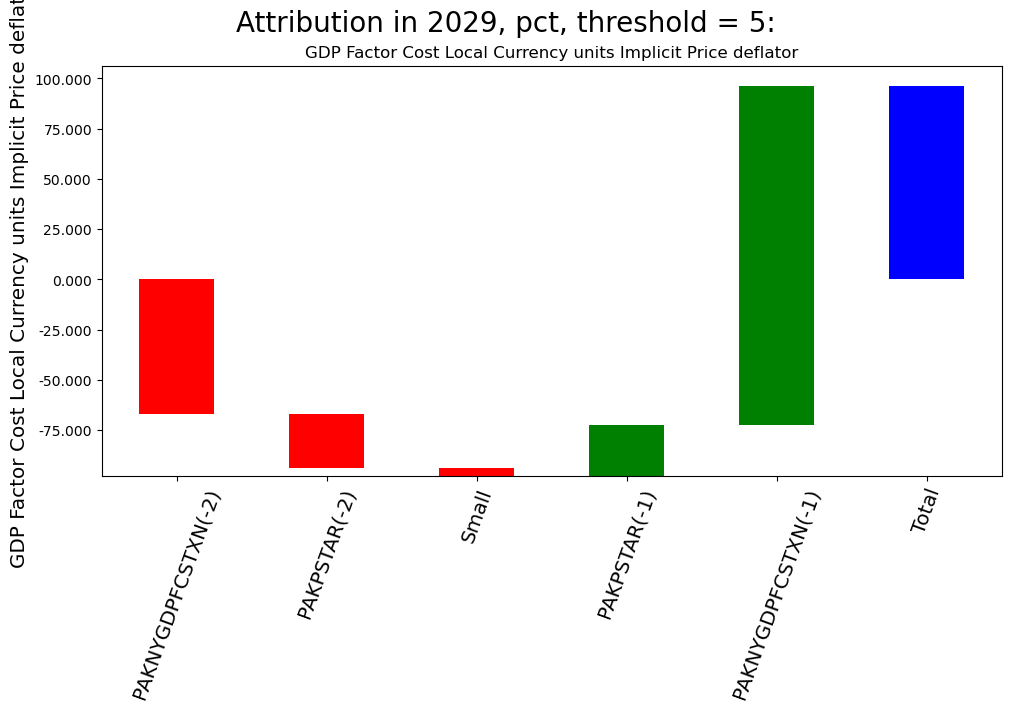

In [23]:
mpak.dekomp_plot_per('PAKNYGDPFCSTXN',per=2029,threshold=5,sort=True)  # gives a waterfall of contributions

In [24]:
mpak.exodif()

,PAKGGREVCO2CER,PAKGGREVCO2GER,PAKGGREVCO2OER
2020,35.549839,71.000884,38.71065
2021,35.549839,71.000884,38.71065
2022,35.549839,71.000884,38.71065
2023,35.549839,71.000884,38.71065
2024,35.549839,71.000884,38.71065
...,...,...,...
2096,35.549839,71.000884,38.71065
2097,35.549839,71.000884,38.71065
2098,35.549839,71.000884,38.71065
2099,35.549839,71.000884,38.71065


In [25]:
totdekomp = mpak.totdif() # Calculate the total derivative½s of all equations in the model.

Total dekomp took       :         3.379 Seconds


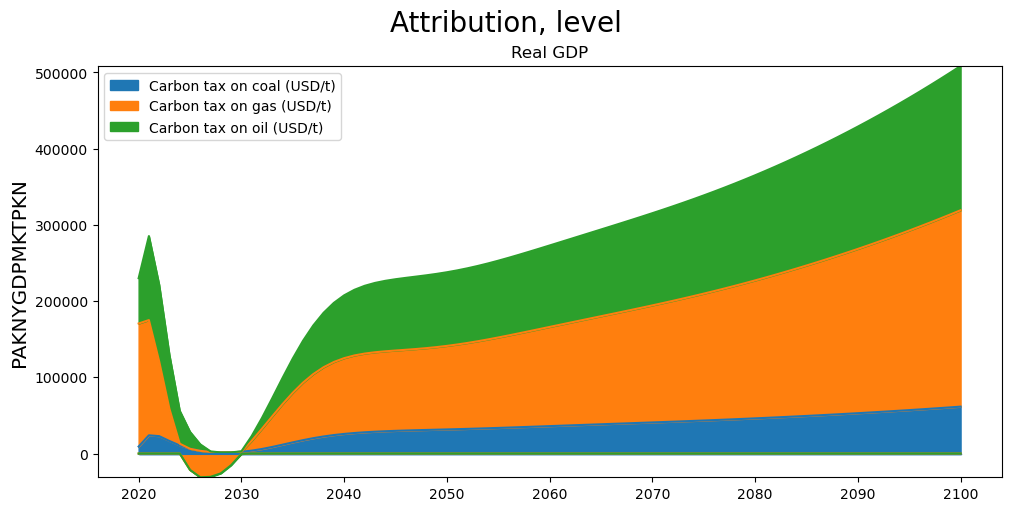

In [26]:
showvar = 'PAKNYGDPMKTPKN'
totdekomp.explain_all(showvar,kind='area',stacked=True);    

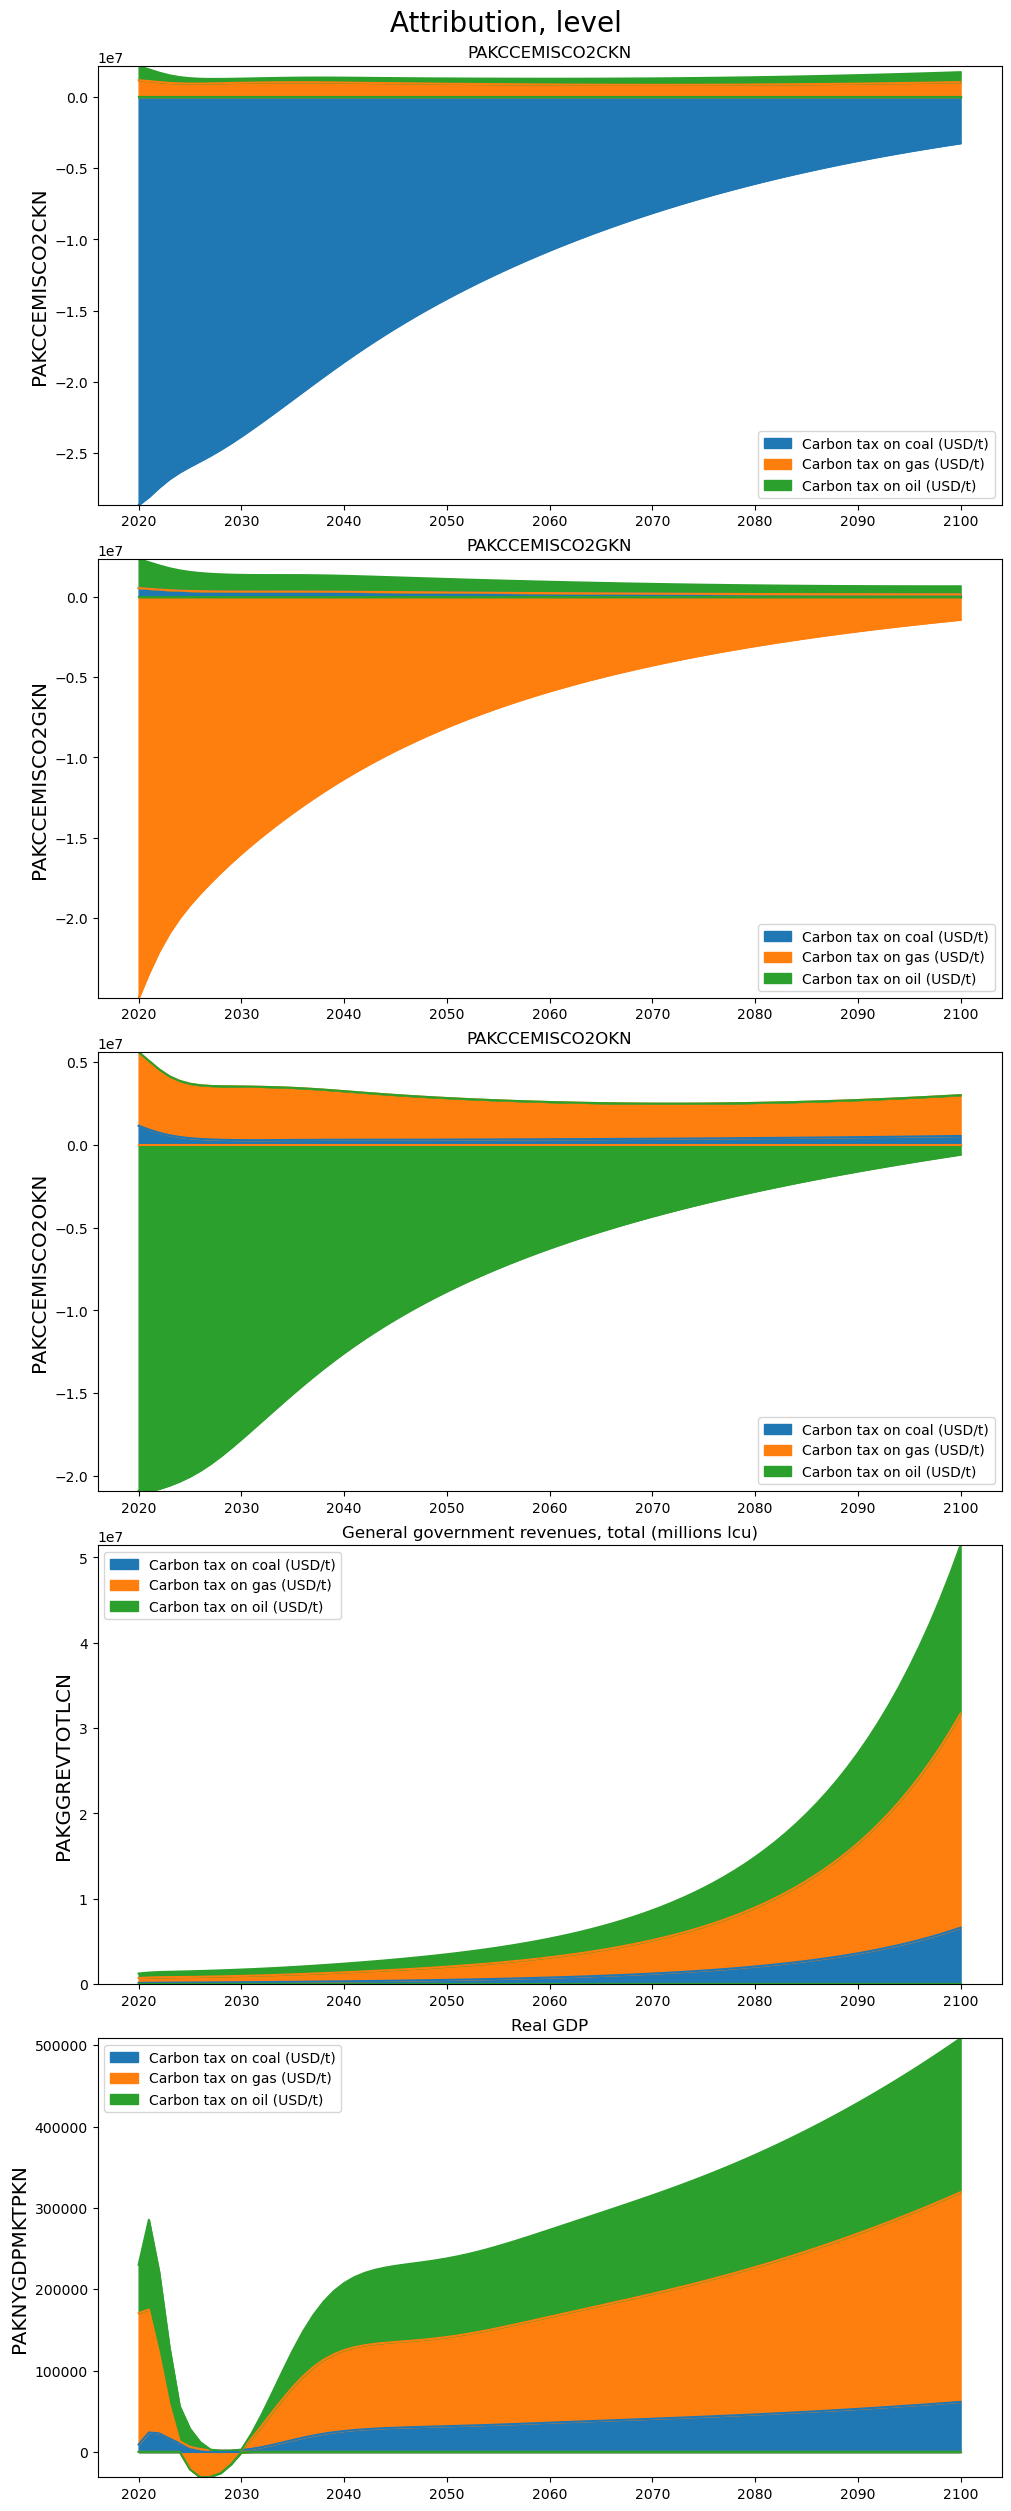

In [27]:
showvar = 'PAKNYGDPMKTPKN PAKCCEMISCO2CKN PAKCCEMISCO2OKN PAKCCEMISCO2GKN PAKGGREVTOTLCN'
totdekomp.explain_all(showvar,kind='area',stacked=True);    

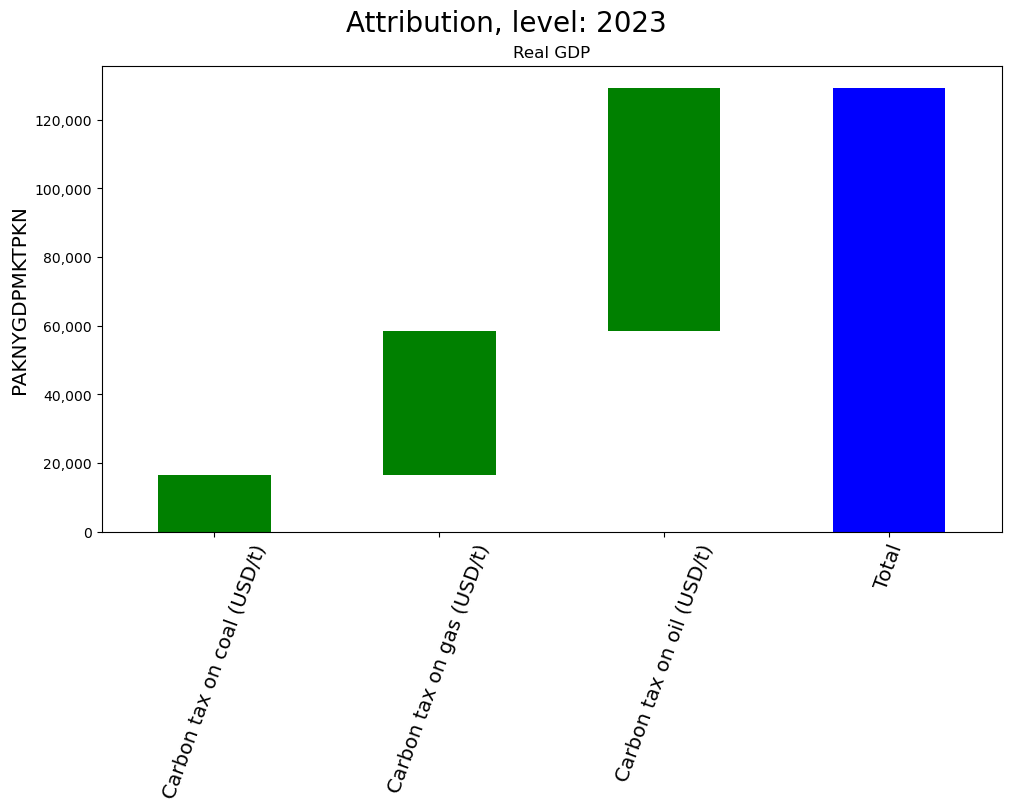

In [28]:
showvar = 'PAKNYGDPMKTPKN'

totdekomp.explain_per(showvar,per=2023,ysize=8)

In [29]:
display(mpak.get_att_gui(var='PAKGGREVTOTLCN',ysize=7));

interactive(children=(Dropdown(description='Variable', index=108, options=('CHNEXR05', 'CHNPCEXN05', 'DEUEXR05…

None

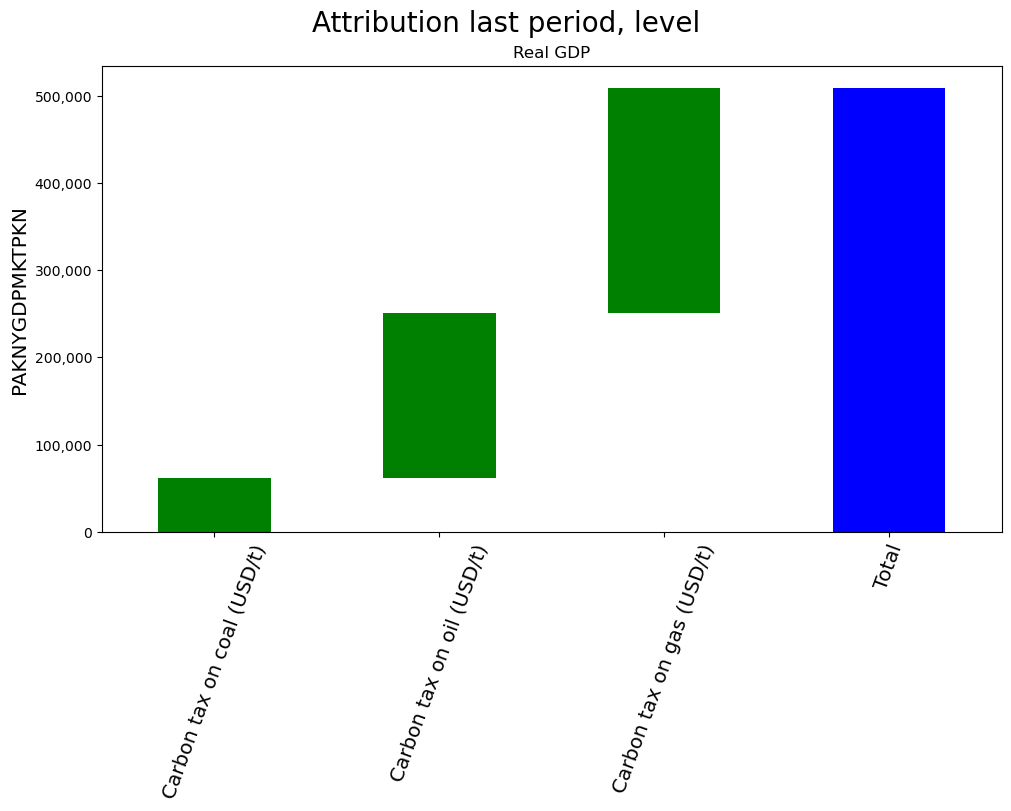

In [30]:
totdekomp.explain_last(showvar,ysize=8)

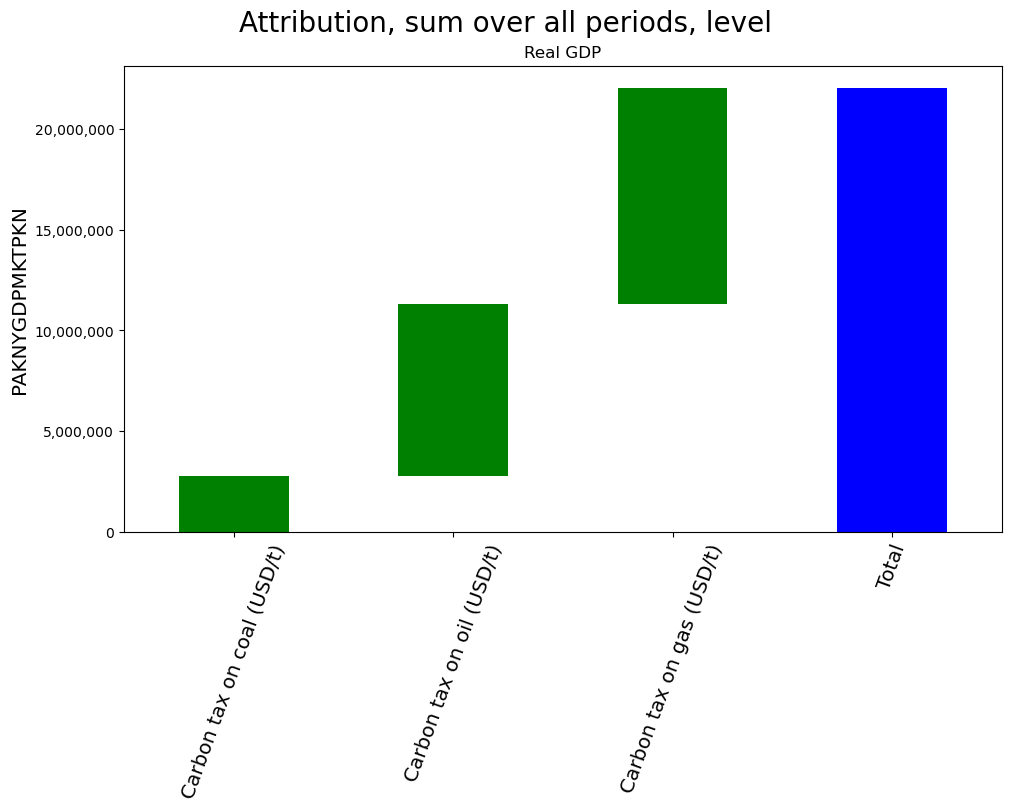

In [31]:
totdekomp.explain_sum(showvar,ysize=8)

In [32]:
experiments = {'gas and coal':['PAKGGREVCO2CER', 'PAKGGREVCO2GER'],'Oil':['PAKGGREVCO2OER']}
totdekomp_group = mpak.totdif(experiments = experiments) # Calculate the total derivative½s of all equations in the model.

Total dekomp took       :         2.392 Seconds


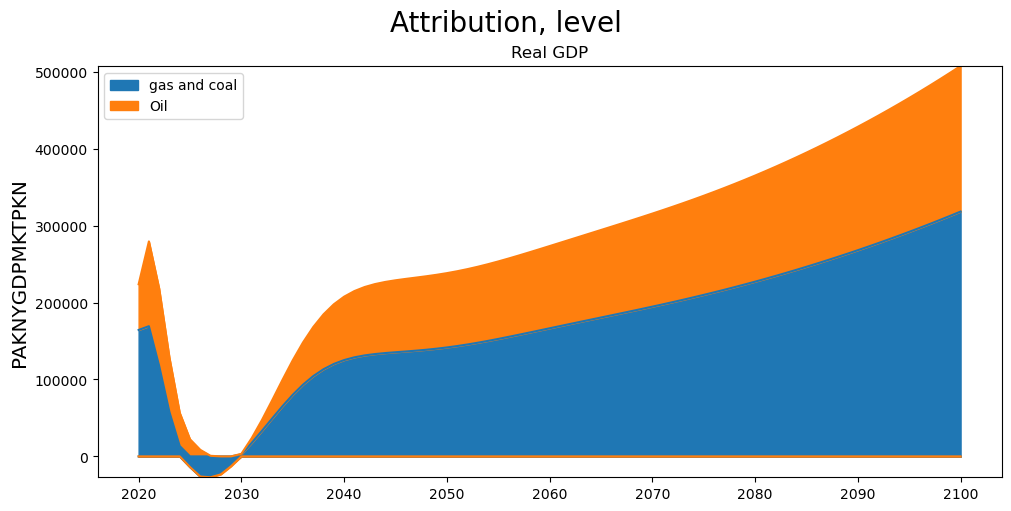

In [33]:
showvar = 'PAKNYGDPMKTPKN'
totdekomp_group.explain_all(showvar,kind='area',stacked=True);    

In [34]:
mpak.dekomp_plot_per('PAKNYGDPMKTPKN',per=2040,pct=0,rename=1,sort=1,threshold =200000,ysize=7);

In [35]:
with mpak.set_smpl(2020,2024):
    mpak['PAKNYGDPMKTPKN'].dekomp(time_att=True)


Formula        : FRML <IDENT> PAKNYGDPMKTPKN = PAKNECONPRVTKN+PAKNECONGOVTKN+PAKNEGDIFTOTKN+PAKNEGDISTKBKN+PAKNEEXPGNFSKN-PAKNEIMPGNFSKN+PAKNYGDPDISCKN+PAKADAP*PAKDISPREPKN $ 

                      2020        2021        2022        2023        2024
Variable   lag                                                            
t-1        0   25760579.27 26471666.00 26767616.83 26891916.75 27090476.06
t          0   26471666.00 26767616.83 26891916.75 27090476.06 27455212.23
Difference 0     711086.73   295950.83   124299.92   198559.31   364736.17
Percent    0          2.76        1.12        0.46        0.74        1.35

 Contributions to differende for  PAKNYGDPMKTPKN
                         2020       2021       2022       2023       2024
Variable       lag                                                       
PAKNECONPRVTKN 0    416507.93  218812.97  107677.34  182518.76  332666.98
PAKNECONGOVTKN 0    348503.70   56821.70   -8433.94   15765.70   61617.96
PAKNEGDIFTOTKN 0    224846

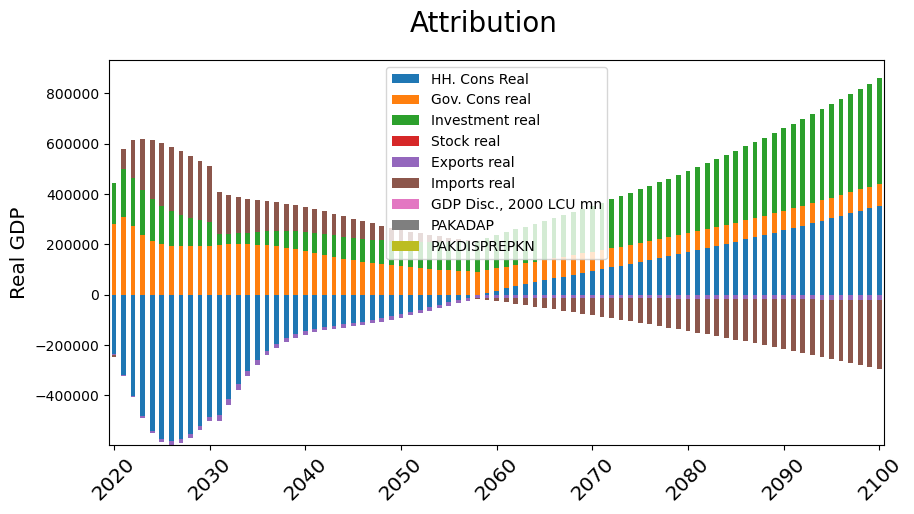

In [36]:
mpak.dekomp_plot('PAKNYGDPMKTPKN',pct=0,rename=1,sort=1,threshold =0,time_att = True);

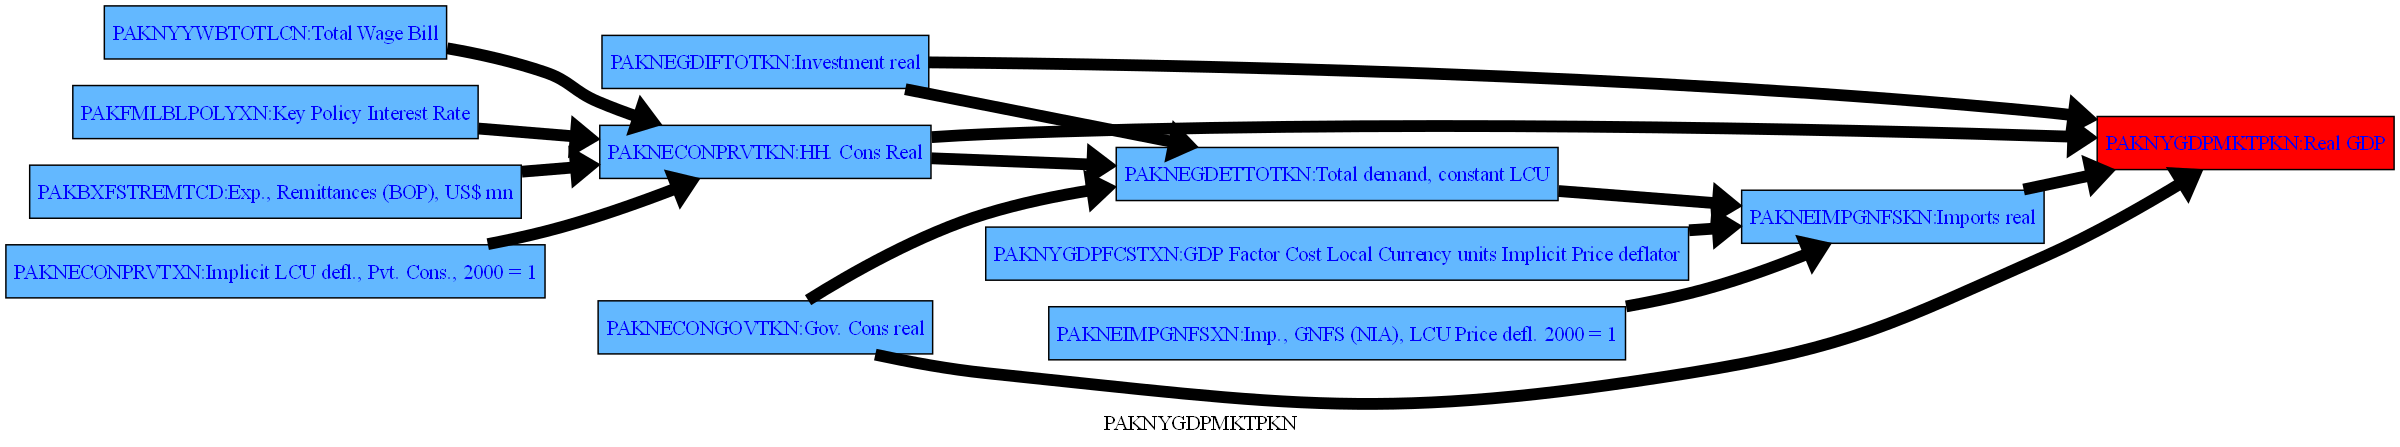

In [37]:
#mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].draw(up=3,down=0,png=latex,filter=20) # For book
mpak['PAKNYGDPMKTPKN'].draw(up=3,down=0,png=latex,filter=400,svg=True,size=(8,40))#3 for interactice

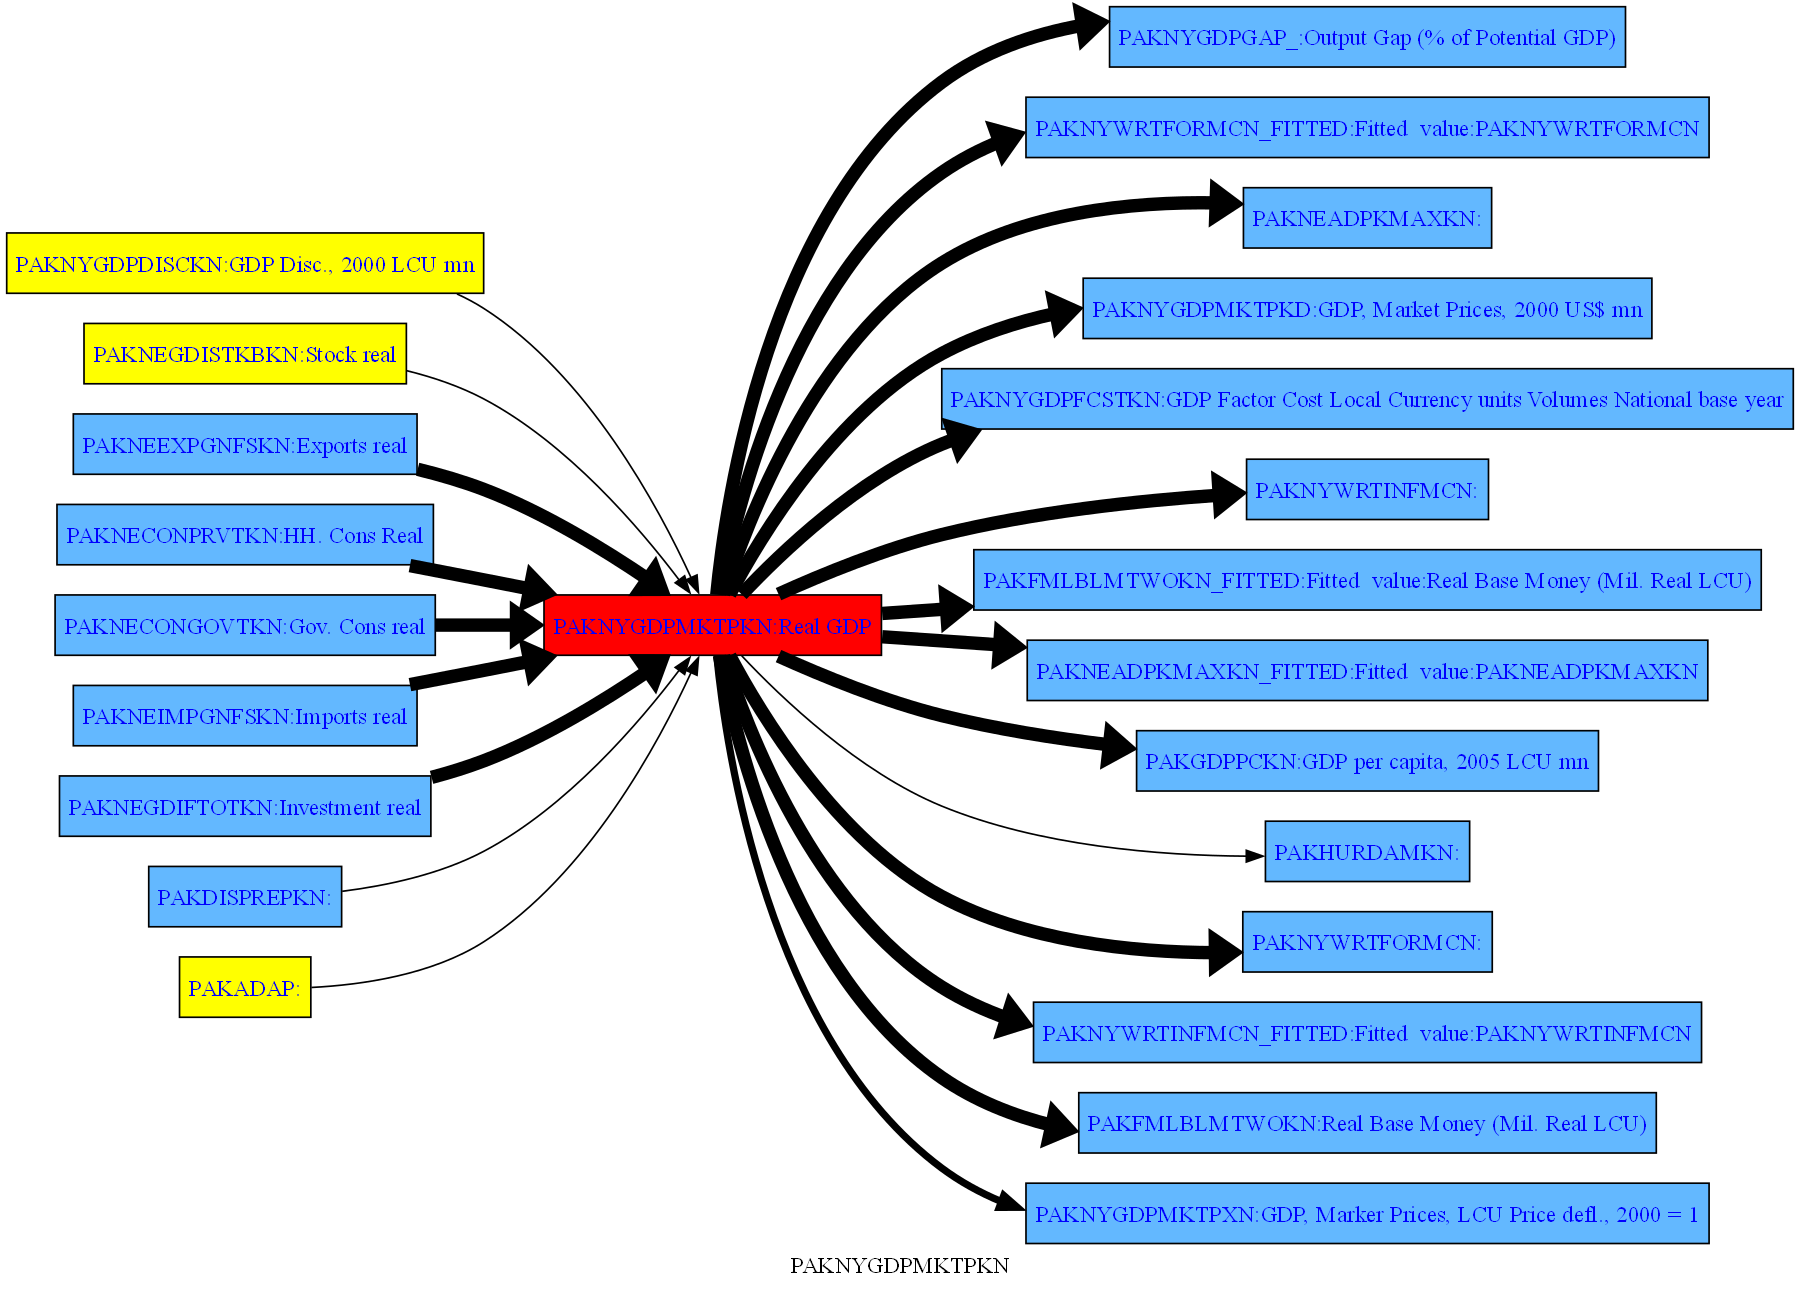

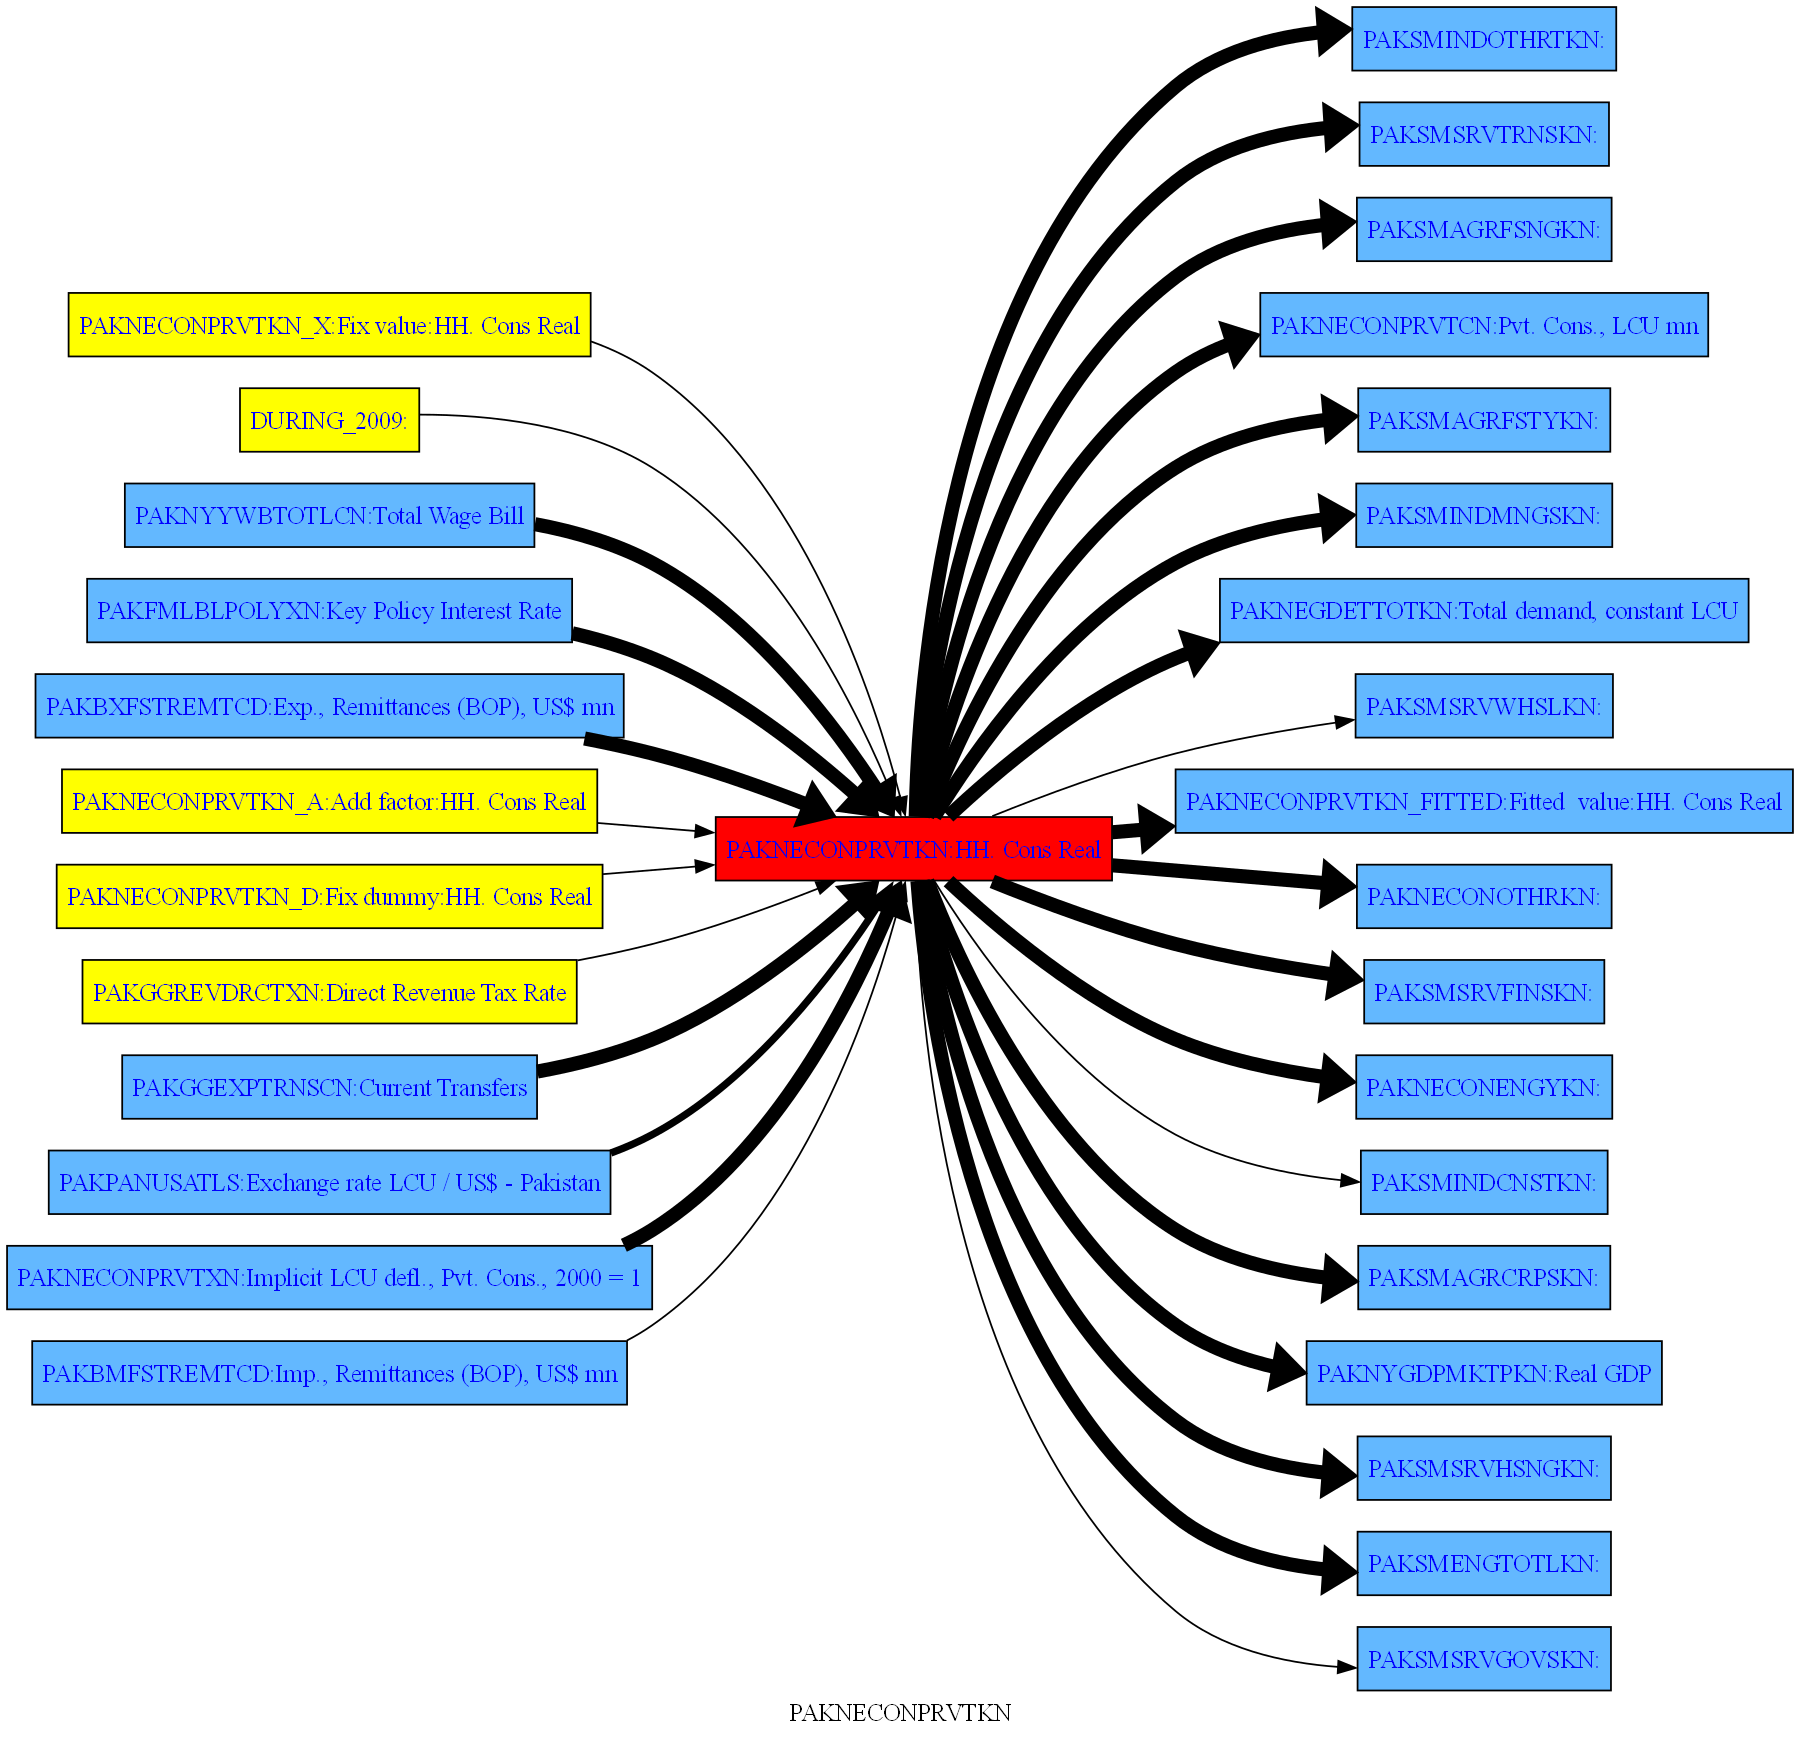

In [38]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].draw(up=1,down=1,png=latex)  # diagram all direct dependencies 

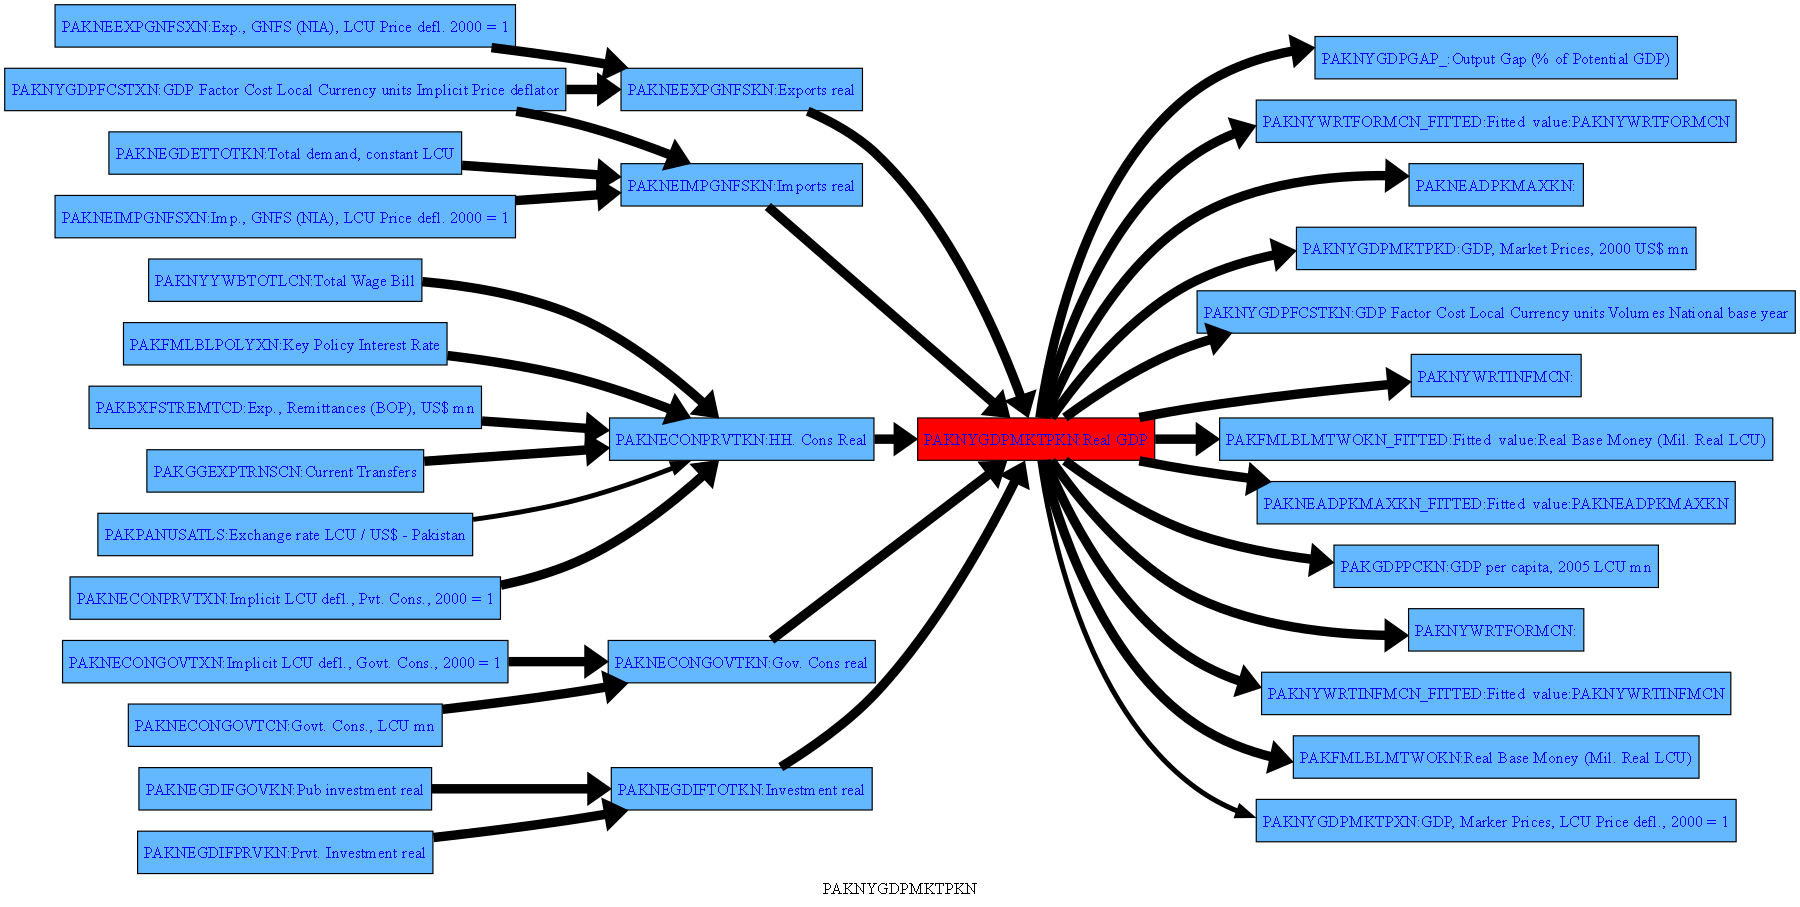

In [39]:
mpak['PAKNYGDPMKTPKN'].draw(up=2,down=1,png=latex,filter=20) 

In [40]:

try:
    mpak.modeldash('PAKNYGDPMKTPKN',jupyter=1,inline=False)
except: 
    print('No Dashboard installed')

apprun
Dash is running on http://127.0.0.1:5001/



Dash app running on http://127.0.0.1:5001/
